# 5. Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neural_network as nn

## 5.1 Feed-forward Network Functions

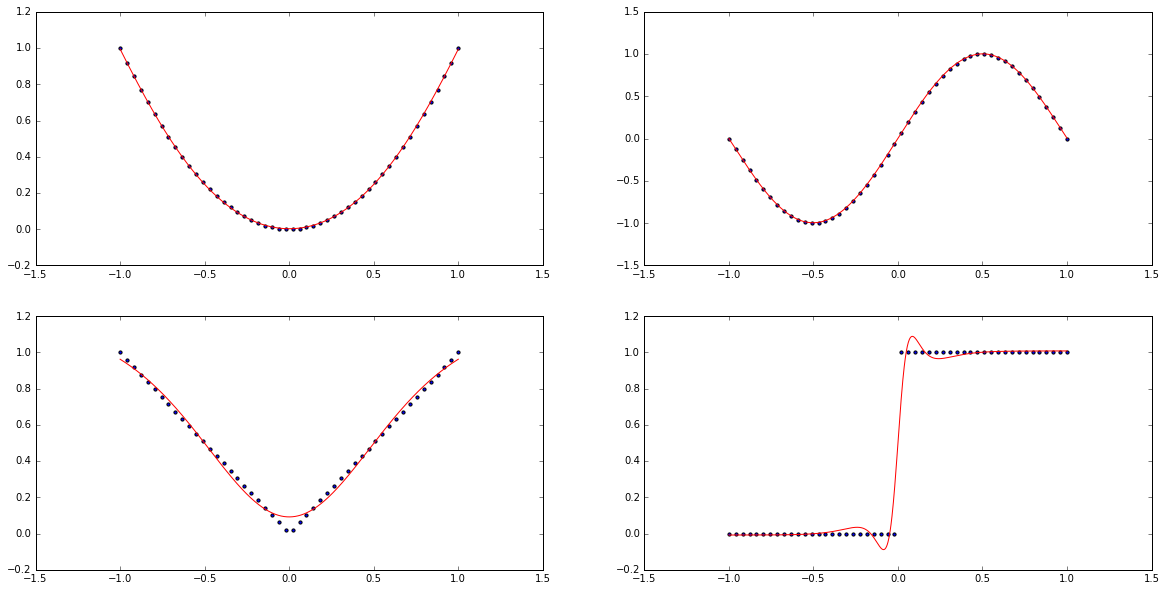

In [2]:
def create_toy_data(func, n=50):
    x = np.linspace(-1, 1, n)[:, None]
    return x, func(x)

def quadratic(x):
    return x ** 2

def sinusoidal(x):
    return np.sin(np.pi * x)

def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

func_list = [quadratic, sinusoidal, np.abs, heaviside]
plt.figure(figsize=(20, 10))
for i, func in enumerate(func_list):
    plt.subplot(2, 2, i + 1)
    x_train, y_train = create_toy_data(func)
    model = nn.NeuralNetwork([nn.Linear(1, 3), nn.Tanh(), nn.Linear(3, 1)], nn.SumSquaresError())
    for _ in range(100000):
        model.fit(x_train, y_train, learning_rate=0.01)
    x = np.linspace(-1, 1, 1000)[:, None]
    y = model.forward(x)
    plt.scatter(x_train, y_train, s=10)
    plt.plot(x, y, color="r")
plt.show()

## 5.3 Error Backpropagation

In [3]:
def create_toy_data():
    x = np.random.uniform(-1., 1., size=(100, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)

x_train, y_train = create_toy_data()

layers = [nn.Linear(2, 4), nn.Tanh(), nn.Linear(4, 1)]
cost_function = nn.SigmoidCrossEntropy()
model = nn.NeuralNetwork(layers, cost_function)
model.check_implementation()
for i in range(100000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x_train, y_train)))
    model.fit(x_train, y_train, learning_rate=1e-4)

finite difference: 0.0253682377327
back propagation : 0.0253682377047
The two values should be approximately the same
step      0, cost 71.327506
step  10000, cost 28.031564
step  20000, cost 19.882298
step  30000, cost 17.200851
step  40000, cost 15.678231
step  50000, cost 14.575844
step  60000, cost 13.692050
step  70000, cost 12.941460
step  80000, cost 12.279192
step  90000, cost 11.681699


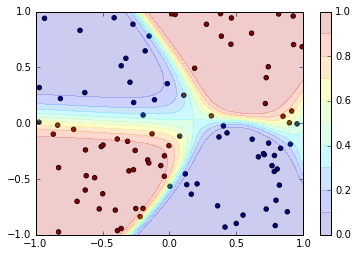

In [4]:
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
y = model.forward(x).reshape(100, 100)

levels = np.linspace(0, 1, 11)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x0, x1, y, levels, alpha=0.2)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# 5.5 Regularization in Neural Networks

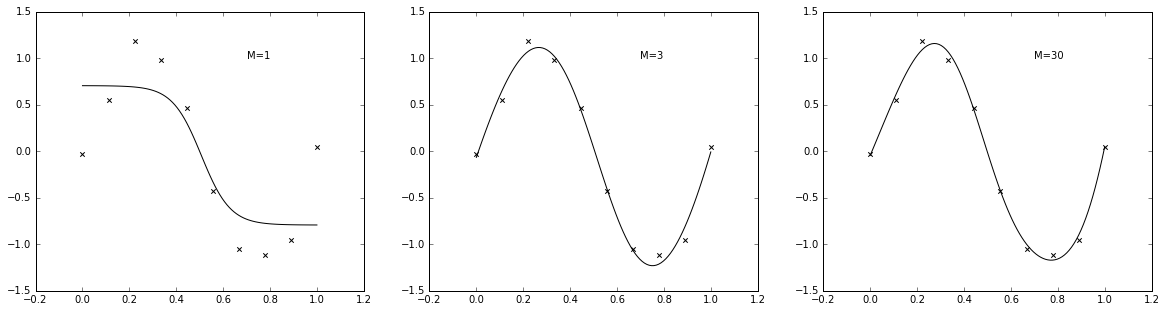

In [5]:
def create_toy_data(n=10):
    x = np.linspace(0, 1, n)[:, None]
    return x, np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=(10, 1))

x_train, y_train = create_toy_data()
x = np.linspace(0, 1, 100)[:, None]

plt.figure(figsize=(20, 5))
for i, m in enumerate([1, 3, 30]):
    plt.subplot(1, 3, i + 1)
    layers = [nn.Linear(1, m), nn.Tanh(), nn.Linear(m, 1)]
    model = nn.NeuralNetwork(layers, nn.SumSquaresError())
    for j in range(10000 * m):
        model.fit(x_train, y_train, learning_rate=0.01)
    y = model.forward(x)
    plt.scatter(x_train, y_train, marker="x", color="k")
    plt.plot(x, y, color="k")
    plt.annotate("M={}".format(m), (0.7, 1.))
plt.show()

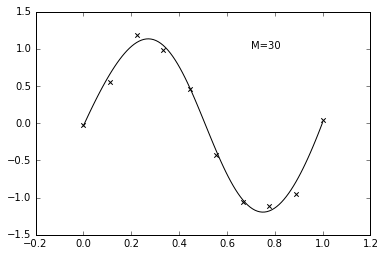

In [6]:
layers = [nn.Linear(1, 30, alpha=1e-3), nn.Tanh(), nn.Linear(30, 1, alpha=1e-3)]
model = nn.NeuralNetwork(layers, nn.SumSquaresError())
for i in range(300000):
    model.fit(x_train, y_train, learning_rate=0.01)
y = model.forward(x)
plt.scatter(x_train, y_train, marker="x", color="k")
plt.plot(x, y, color="k")
plt.annotate("M=30", (0.7, 1.))
plt.show()

## 5.6 Mixture Density Networks

In [7]:
def create_toy_data(func, n=300):
    t = np.random.uniform(size=(n, 1))
    x = func(t) + np.random.uniform(-0.05, 0.05, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func)

In [8]:
def sample(x, t, n=None):
    assert len(x) == len(t)
    N = len(x)
    if n is None:
        n = N
    indices = np.random.choice(N, n, replace=False)
    return x[indices], t[indices]

layers = [nn.Linear(1, 5, std=0.1), nn.Tanh(), nn.Linear(5, 9, std=0.1)]
cost_function = nn.GaussianMixture(3)
model = nn.NeuralNetwork(layers, cost_function)
model.check_implementation(np.array([[0.5]]), np.array([[0.5]]))
learning_rate = 1e-4
for i in range(300000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x_train, y_train)))
        learning_rate *= 0.9
    batch = sample(x_train, y_train, n=100)
    model.fit(*batch, learning_rate=learning_rate)

finite difference: -0.000118102971847
back propagation : -0.00011810301972
The two values should be approximately the same
step      0, cost 328.432305
step  10000, cost -123.717709
step  20000, cost -294.734590
step  30000, cost -346.414453
step  40000, cost -346.241078
step  50000, cost -371.900827
step  60000, cost 175.883352
step  70000, cost -369.644184
step  80000, cost -289.283591
step  90000, cost -392.123636
step 100000, cost -380.312819
step 110000, cost -413.047977
step 120000, cost -414.476552
step 130000, cost -393.240781
step 140000, cost -413.545073
step 150000, cost -305.874949
step 160000, cost -434.133810
step 170000, cost -270.558555
step 180000, cost -435.544611
step 190000, cost -442.234868
step 200000, cost -416.642359
step 210000, cost -447.681625
step 220000, cost -450.238457
step 230000, cost -451.412413
step 240000, cost -438.138117
step 250000, cost -446.099146
step 260000, cost -451.368548
step 270000, cost -457.926739
step 280000, cost -458.393109
step 2900

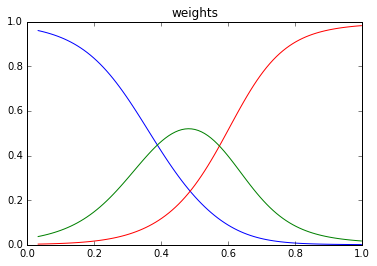

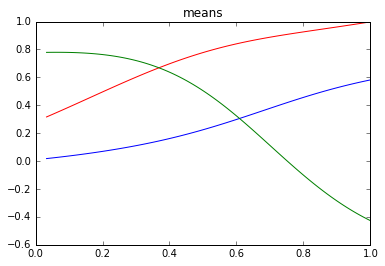

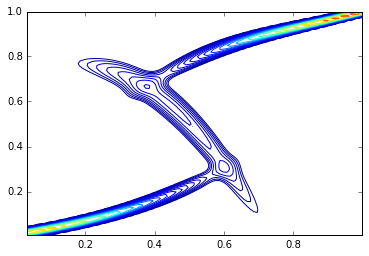

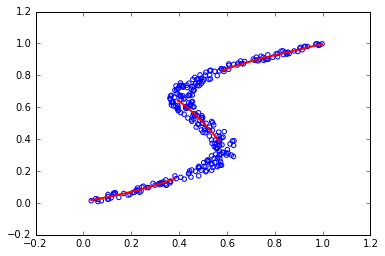

In [9]:
x, y = np.meshgrid(
    np.linspace(x_train.min(), x_train.max(), 100),
    np.linspace(y_train.min(), y_train.max(), 100))
xy = np.array([x, y]).reshape(2, -1).T

sigma, weight, mu = model.forward(xy[:, 0].reshape(-1, 1))
probs = cost_function.gauss(mu, sigma, xy[:, 1].reshape(-1, 1))
probs = np.sum(weight * probs, axis=1).reshape(100, 100)

plt.plot(x[0], weight[:100, 0], color="blue")
plt.plot(x[0], weight[:100, 1], color="red")
plt.plot(x[0], weight[:100, 2], color="green")
plt.title("weights")
plt.show()

plt.plot(x[0], mu[:100, 0], color="blue")
plt.plot(x[0], mu[:100, 1], color="red")
plt.plot(x[0], mu[:100, 2], color="green")
plt.title("means")
plt.show()

levels_log = np.linspace(0, np.log(probs.max()), 21)
levels = np.exp(levels_log)
levels[0] = 0
plt.contour(x, y, probs, levels)
plt.xlim(x_train.min(), x_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.show()

argmax = np.argmax(weight[:100], axis=1)
for i in range(3):
    indices = np.where(argmax == i)[0]
    plt.plot(x[0, indices], mu[(indices, np.zeros_like(indices) + i)], color="r", linewidth=2)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b")
plt.show()

## 5.7 Bayesian Neural Networks